In [1]:
#==============================================================================
# Import libraries
#==============================================================================
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#==============================================================================
# import the dataset of Home Buyers prices
#==============================================================================

flatdata = pd.read_csv ('HomeBuyer.csv')

In [3]:
#==============================================================================
# check for Null values
#==============================================================================

flatdata.isnull().any()


Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [4]:
#==============================================================================
# check for data types
#==============================================================================

flatdata.dtypes


Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [5]:
#==============================================================================
# Data exploration
#==============================================================================
flatdata.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
flatdata.shape

(400, 3)

In [7]:

X = flatdata.iloc [:,[0,1]].values
y = flatdata.iloc [:,2].values

In [8]:
#==============================================================================
# split the dataset into training and test set. We will use 75/25 approach
#==============================================================================

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 1/4, 
                                                     random_state = 0)

In [9]:
#==============================================================================
# Feature scalling 
#==============================================================================

from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
X_train = independent_scalar.fit_transform (X_train) #fit and transform
X_test = independent_scalar.transform (X_test) # only transform

In [10]:
#==============================================================================
# Fit the Logistic regression to the train data. Logistic regression is a 
# linear classifier after which the data is divided by a straight line.
#==============================================================================
from sklearn.linear_model import LogisticRegression
LRClassifier = LogisticRegression (random_state = 0)
LRClassifier.fit (X_train, y_train)

LogisticRegression(random_state=0)

In [11]:
#==============================================================================
# Predict the values 
#==============================================================================

prediction = LRClassifier.predict (X_test)


In [12]:
#==============================================================================
# Create confusion matrix to evaluate performance of data
#==============================================================================
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix (y_test, prediction)

print(confusionMatrix)



[[65  3]
 [ 8 24]]


[[4.63387732e-08 4.68561390e-08 4.73792811e-08 ... 2.96589919e-03
  2.99891372e-03 3.03229464e-03]
 [4.73111493e-08 4.78393715e-08 4.83734913e-08 ... 3.02794738e-03
  3.06165047e-03 3.09572755e-03]
 [4.83039297e-08 4.88432362e-08 4.93885640e-08 ... 3.09128962e-03
  3.12569555e-03 3.16048320e-03]
 ...
 [9.78487001e-01 9.78719483e-01 9.78949508e-01 ... 9.99999658e-01
  9.99999661e-01 9.99999665e-01]
 [9.78919832e-01 9.79147737e-01 9.79373230e-01 ... 9.99999665e-01
  9.99999668e-01 9.99999672e-01]
 [9.79344139e-01 9.79567553e-01 9.79788599e-01 ... 9.99999671e-01
  9.99999675e-01 9.99999679e-01]]


[None, (-5.0, 5.0), (-5.0, 5.0), Text(0.5, 0, '$X_1$'), Text(0, 0.5, '$X_2$')]

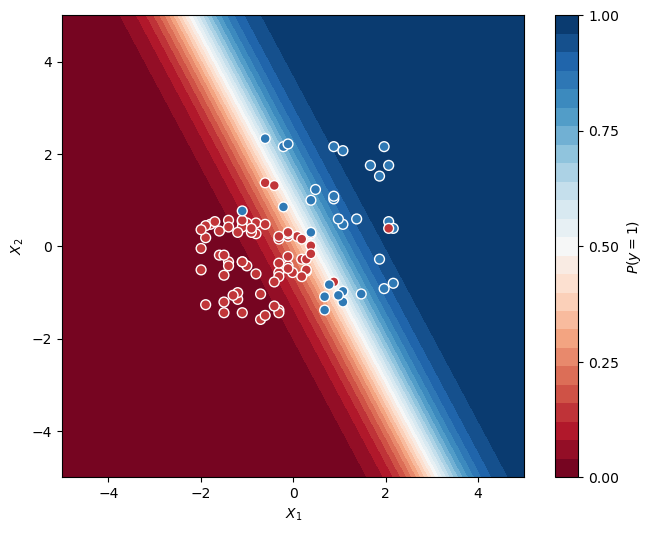

In [13]:
#==============================================================================
# let us visualize it
#==============================================================================
    
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = LRClassifier.predict_proba(grid)[:, 1].reshape(xx.shape)

print(probs)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_test[:, 0], X_test[:, 1],c = (y_test == 1 ), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

In [14]:
#==============================================================================
# So now let us visualize the Test set
#==============================================================================
plt.show()

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
acc = accuracy_score(y_test,prediction)

In [17]:
acc

0.89

In [18]:
#==============================================================================
# Fit the Logistic regression to the train data. Logistic regression is a 
# linear classifier after which the data is divided by a straight line.
#==============================================================================
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier ()
KNN.fit (X_train, y_train)

KNeighborsClassifier()

In [19]:
KNN_pred = KNN.predict (X_test)

In [20]:
KNN_acc = accuracy_score(y_test, KNN_pred)
KNN_acc

0.93

In [21]:
KNN_confusionMatrix = confusion_matrix (y_test, KNN_pred)
print(KNN_confusionMatrix)

[[64  4]
 [ 3 29]]


In [22]:
from sklearn.svm import SVC
SVC = SVC()
SVC.fit (X_train, y_train)

SVC_pred = SVC.predict (X_test)

SVC_confusionMatrix = confusion_matrix (y_test, SVC_pred)
print(SVC_confusionMatrix)

SVC_acc = accuracy_score(y_test, SVC_pred)
print(SVC_acc)

[[64  4]
 [ 3 29]]
0.93


In [23]:
from sklearn.neural_network import MLPClassifier
Neural_clf = MLPClassifier(max_iter=500)
Neural_clf.fit (X_train, y_train)

Neural_clf_pred = Neural_clf.predict (X_test)

Neural_clf_confusionMatrix = confusion_matrix (y_test, Neural_clf_pred)
print(Neural_clf_confusionMatrix)

Neural_clf_acc = accuracy_score(y_test, Neural_clf_pred)
print(Neural_clf_acc)

[[64  4]
 [ 3 29]]
0.93


[None, (-5.0, 5.0), (-5.0, 5.0), Text(0.5, 0, '$X_1$'), Text(0, 0.5, '$X_2$')]

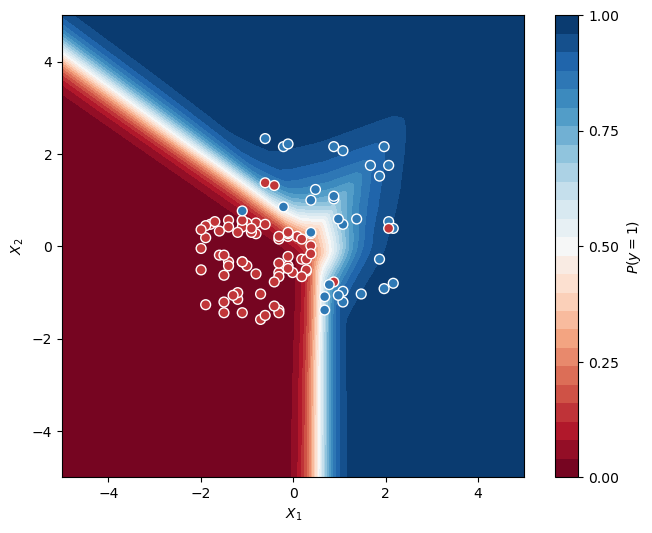

In [24]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = Neural_clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_test[:, 0], X_test[:, 1],c = (y_test == 1 ), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

from sklearn.gaussian_process import Gaussian
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [30]:
from sklearn.gaussian_process import GaussianProcessClassifier
GP_clf = GaussianProcessClassifier()
GP_clf.fit (X_train, y_train)

GP_clf_pred = GP_clf.predict (X_test)

GP_clf_confusionMatrix = confusion_matrix (y_test, GP_clf_pred)
print(GP_clf_confusionMatrix)

GP_clf_acc = accuracy_score(y_test, GP_clf_pred)
print(GP_clf_acc)

[[64  4]
 [ 3 29]]
0.93


[None, (-5.0, 5.0), (-5.0, 5.0), Text(0.5, 0, '$X_1$'), Text(0, 0.5, '$X_2$')]

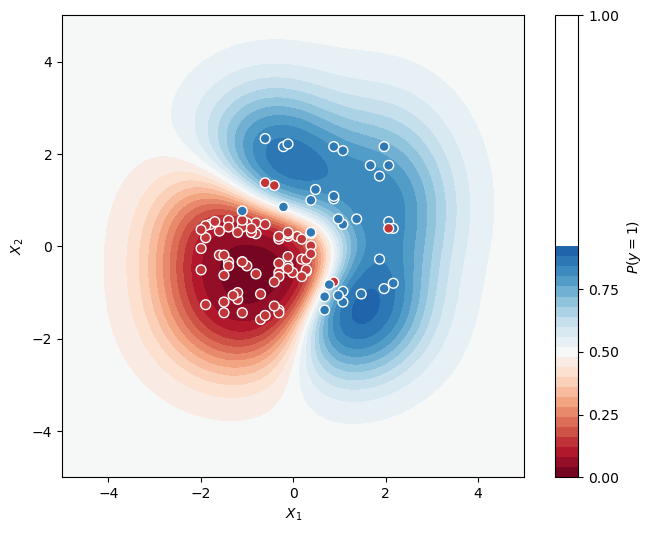

In [31]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = GP_clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_test[:, 0], X_test[:, 1],c = (y_test == 1 ), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

In [32]:
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier()
DT_clf.fit (X_train, y_train)

DT_clf_pred = DT_clf.predict (X_test)

DT_clf_confusionMatrix = confusion_matrix (y_test, DT_clf_pred)
print(DT_clf_confusionMatrix)

DT_clf_acc = accuracy_score(y_test, DT_clf_pred)
print(DT_clf_acc)

[[62  6]
 [ 3 29]]
0.91


[None, (-5.0, 5.0), (-5.0, 5.0), Text(0.5, 0, '$X_1$'), Text(0, 0.5, '$X_2$')]

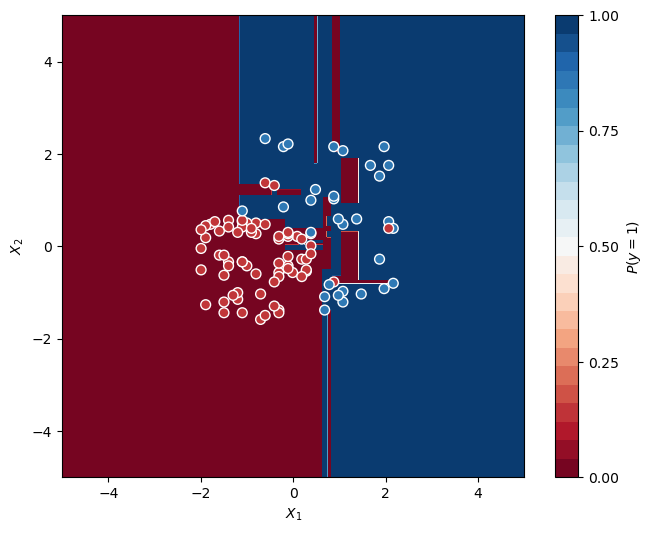

In [33]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = DT_clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_test[:, 0], X_test[:, 1],c = (y_test == 1 ), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

In [35]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier()
RF_clf.fit (X_train, y_train)

RF_clf_pred = RF_clf.predict (X_test)

RF_clf_confusionMatrix = confusion_matrix (y_test, RF_clf_pred)
print(RF_clf_confusionMatrix)

RF_clf_acc = accuracy_score(y_test, RF_clf_pred)
print(RF_clf_acc)

[[62  6]
 [ 4 28]]
0.9


[(-5, 5), Text(0,0.5,'$X_2$'), (-5, 5), Text(0.5,0,'$X_1$'), None]

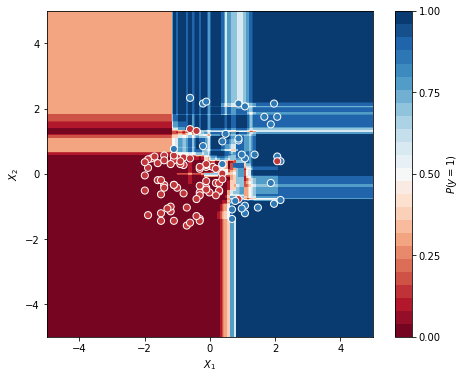

In [0]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = RF_clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_test[:, 0], X_test[:, 1],c = (y_test == 1 ), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")